In [1]:
import pandas as pd 
import numpy as np 
from gensim.models import KeyedVectors
from scipy import spatial
import matplotlib.pyplot as plt

In [2]:
skip100 = KeyedVectors.load_word2vec_format('skip_s100.txt')

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('politicos.csv').drop(columns = 'Unnamed: 0')

In [ ]:
df['clean_text'] = df['clean_text'].apply(eval)

In [ ]:
def avg_feature_vector(words, model, num_features):
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    index2word_set = set(model.index_to_key)
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
def avg_tweets(candidato, tema, model, num_feats):
    feature_vec = np.zeros((num_feats, ), dtype='float32')
    n_tweets = 0
    for i in df.index:
        if tema in df['clean_text'][i]:
            if candidato in df['user_name'][i]:
                n_tweets +=1
                feature_vec = np.add(feature_vec, avg_feature_vector(df['clean_text'][i], model, num_features=100))
    if (n_tweets > 0):
        feature_vec = np.divide(feature_vec, n_tweets)
    return feature_vec

In [ ]:
def similaridade_candidatos(candidato1, candidato2, tema, model, num_features):
    cand1 = avg_tweets(candidato1, tema, model, num_feats = num_features)
    cand2 = avg_tweets(candidato2, tema, model, num_feats = num_features)
    sim = 1 - spatial.distance.cosine(cand1, cand2)
    return sim

In [ ]:
def correlacao(tema, model, num_features):
    similarity_array = np.zeros((11,11))

    #isso aqui tá demorando um pouco pra rodar:
    for i in range(11):
        for j in range(11):
            similarity_array[i][j] = round(similaridade_candidatos(df['user_name'].unique()[i], df['user_name'].unique()[j],tema, model, num_features), 2)

    fig, ax = plt.subplots()
    im = ax.imshow(similarity_array,cmap="coolwarm_r")

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Similaridade do discurso", rotation=-90, va="bottom")

    ax.set_xticks(np.arange(len(df['user_name'].unique())), labels=df['user_name'].unique())
    ax.set_yticks(np.arange(len(df['user_name'].unique())), labels=df['user_name'].unique())

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    ax.spines[:].set_visible(False)
    ax.set_xticks(np.arange(len(df['user_name'].unique())+1)-.5, minor=True)
    ax.set_yticks(np.arange(len(df['user_name'].unique())+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    for i in range(len(df['user_name'].unique())):
        for j in range(len(df['user_name'].unique())):
            text = ax.text(j, i, similarity_array[i, j],
                        ha="center", va="center", color="w")
            
    plt.gcf().set_size_inches(20, 10)
    ax.set_title(f"Correlação do tema '{tema}'", fontsize = 22)
    plt.show()

C:\Users\rian2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\spatial\distance.py:630: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


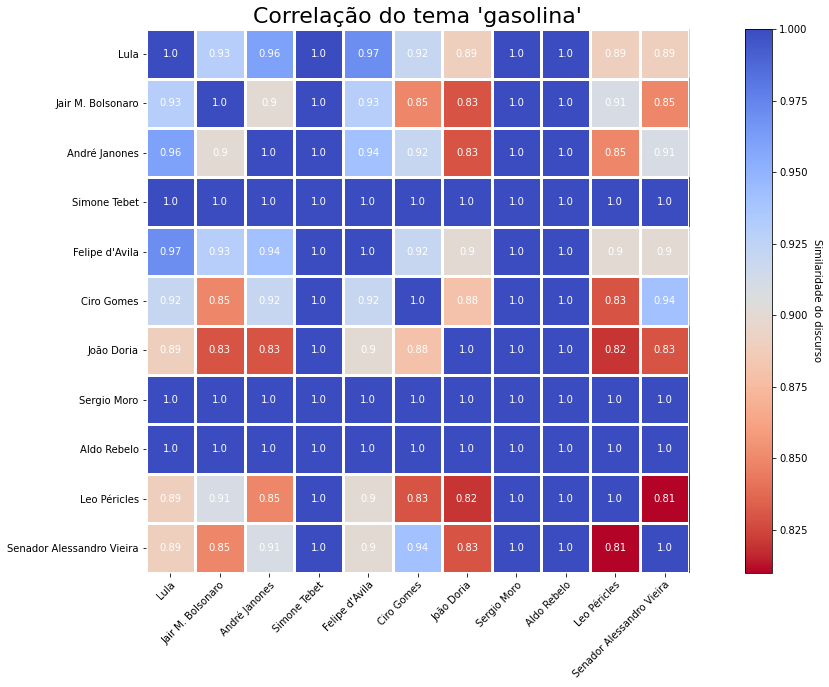

In [ ]:
correlacao('gasolina', skip100, 100)

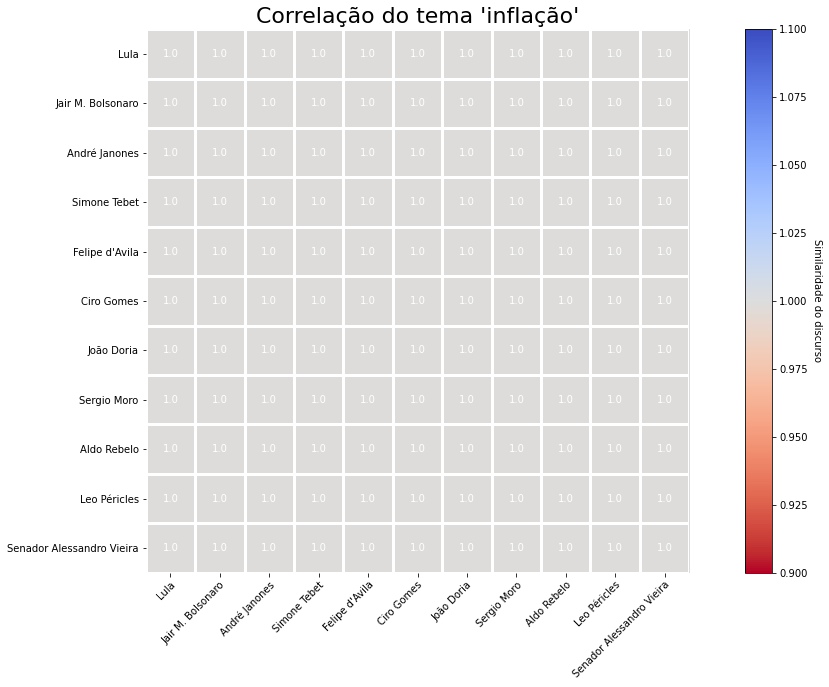

In [ ]:
correlacao('inflação', skip100, 100)

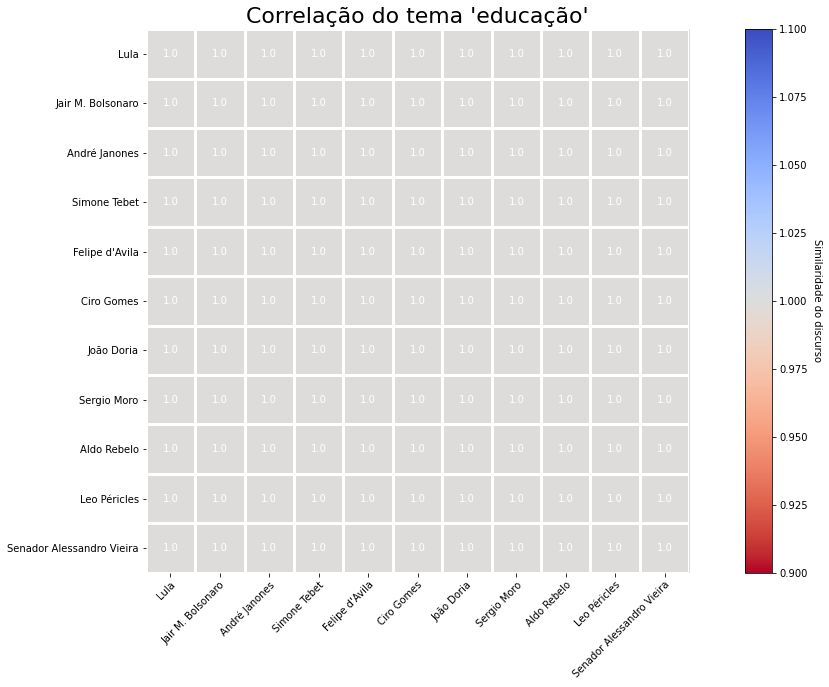

In [ ]:
correlacao('educação', skip100, 100)

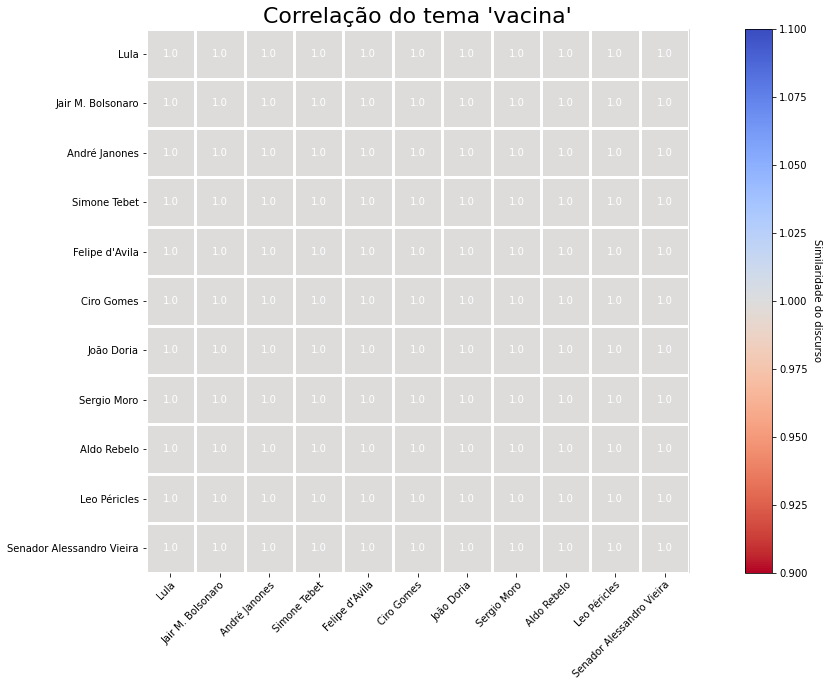

In [ ]:
correlacao('vacina', skip100, 100)

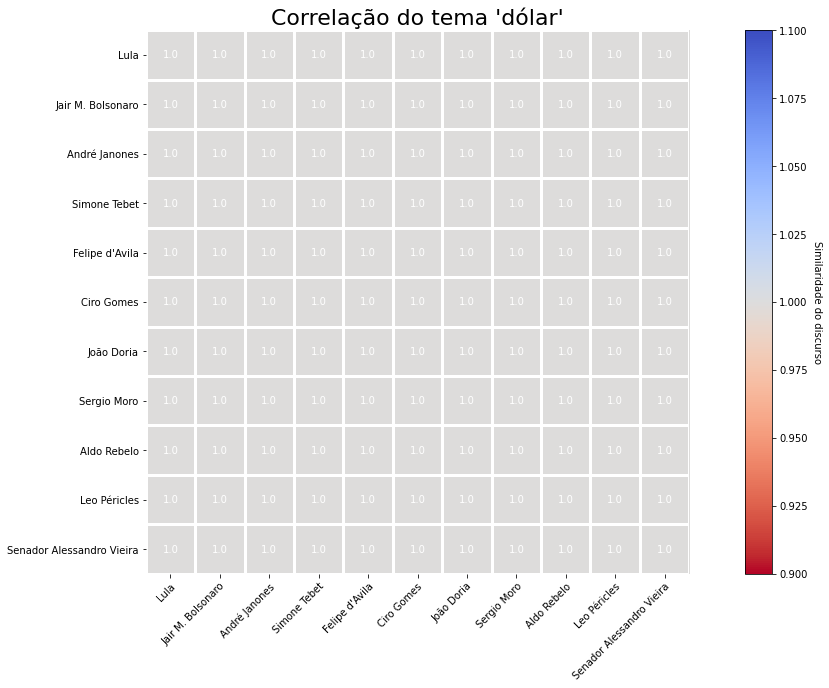

In [ ]:
correlacao('dólar', skip100, 100)

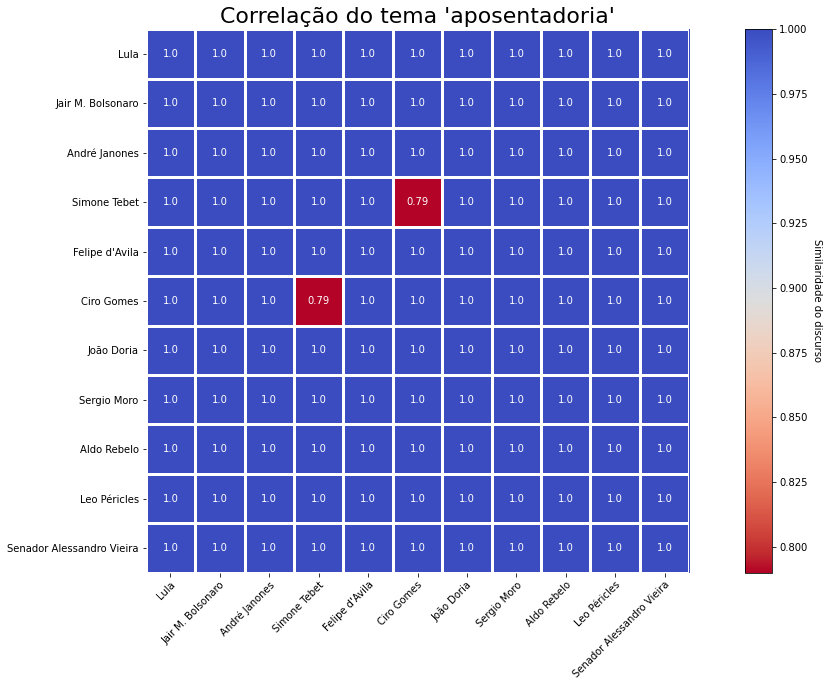

In [ ]:
correlacao('aposentadoria', skip100, 100)

não fiz com duas palavras juntas, tipo "fundo eleitoral", "proteção ambiental", "fake news" e "direitos trabalhistas" porque teria que juntá-las no pré-processamento

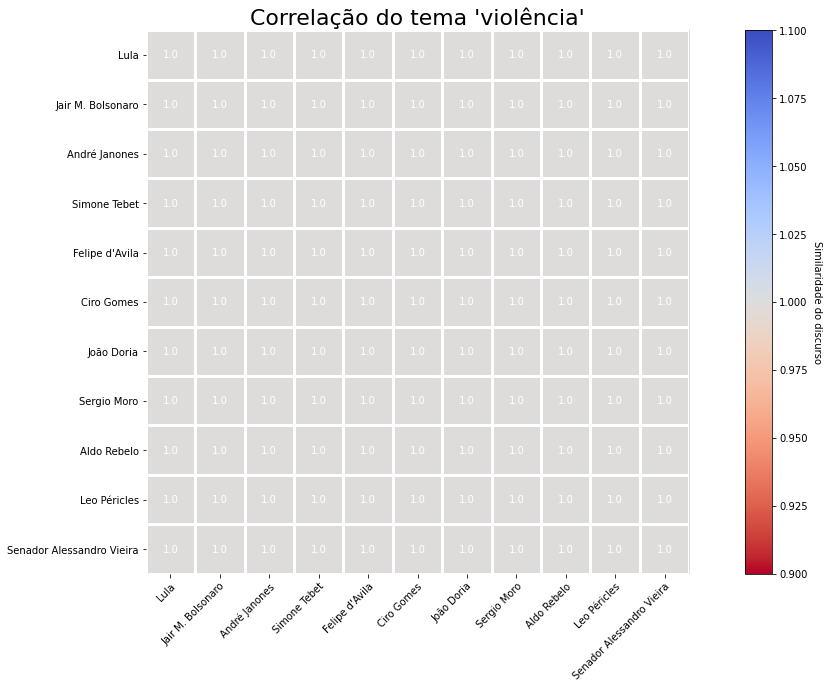

In [ ]:
correlacao('violência', skip100, 100)

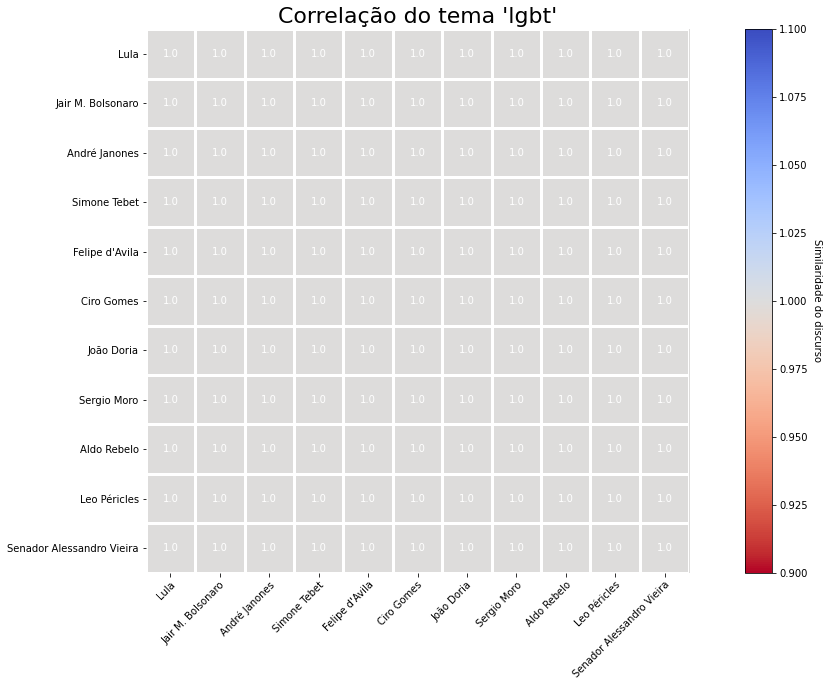

In [ ]:
correlacao('lgbt', skip100, 100)

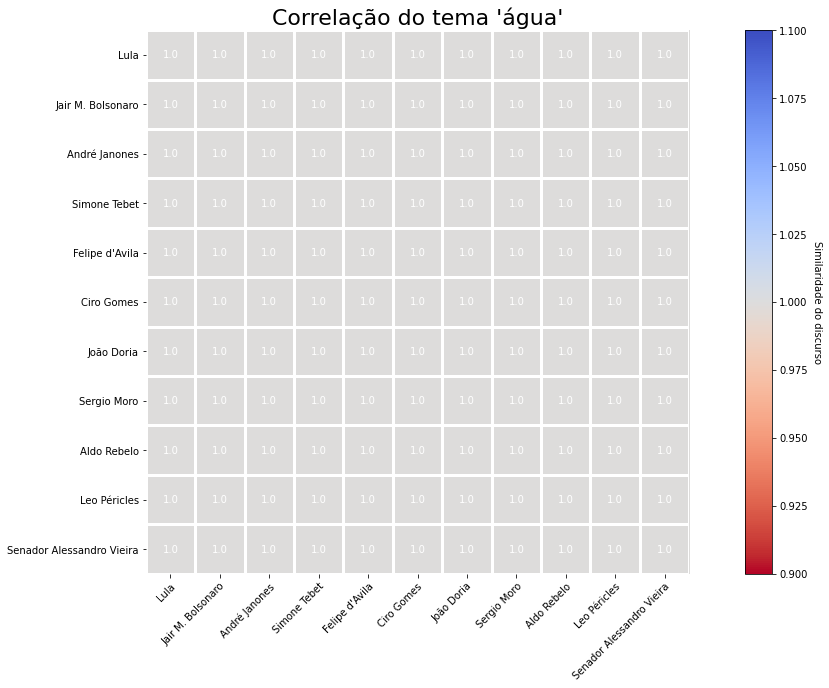

In [ ]:
correlacao('água', skip100, 100)

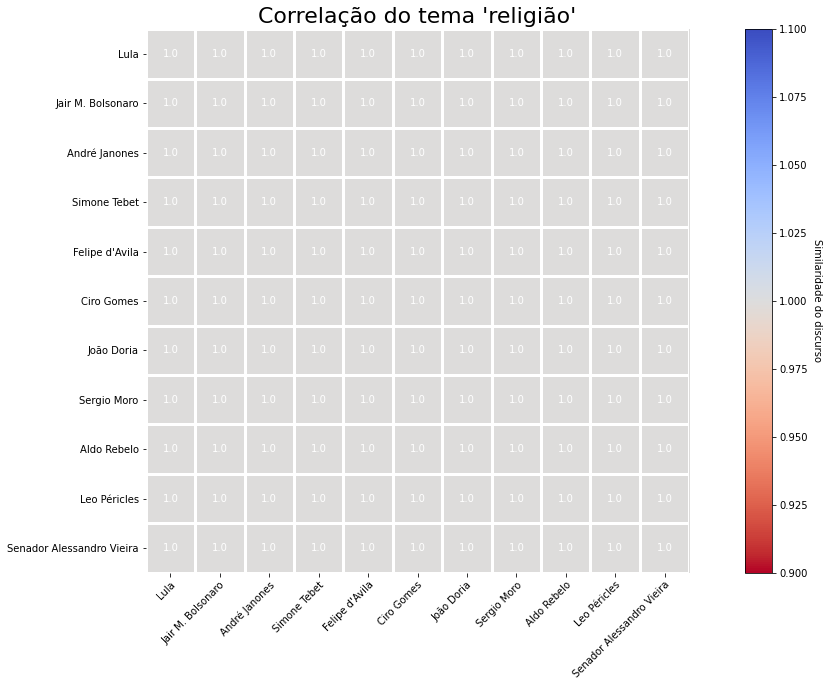

In [ ]:
correlacao('religião', skip100, 100)

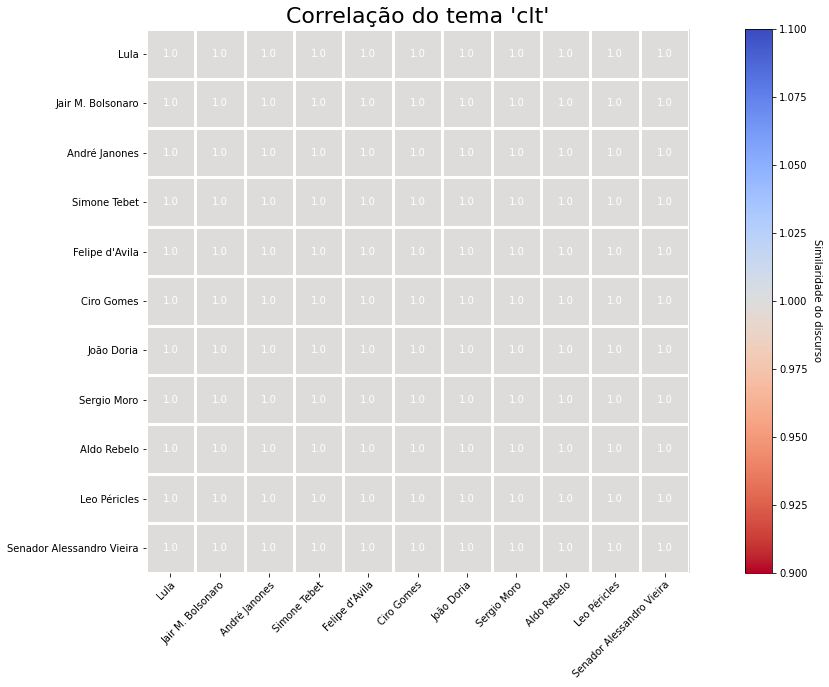

In [ ]:
correlacao('clt', skip100, 100)

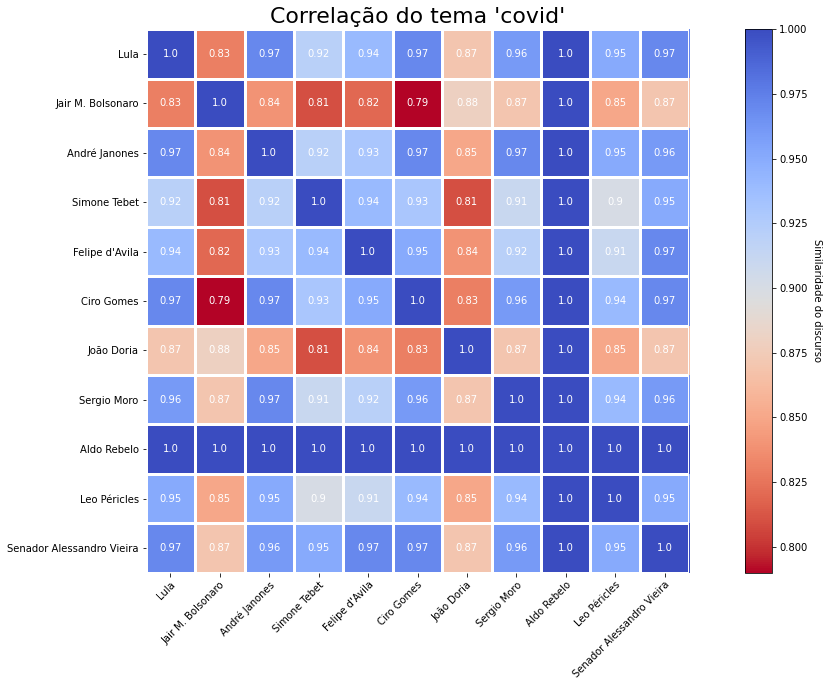

In [ ]:
correlacao('covid', skip100, 100)